## What’s Wrong with Matplotlib’s Default Styles?

解析度、框線、字體都不是流行的樣子。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]
# Immitate 10 years of data
xs = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(float(val * seasonal_multipliers[i]))

x = pd.date_range(start="2015-01-01", freq="MS", periods=120)
y = time_series      

print(x[-10:])
print(y[-10:])

DatetimeIndex(['2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')
[133.2, 168.0, 214.7, 262.2, 241.5, 324.79999999999995, 234.0, 200.6, 178.5, 144.0]


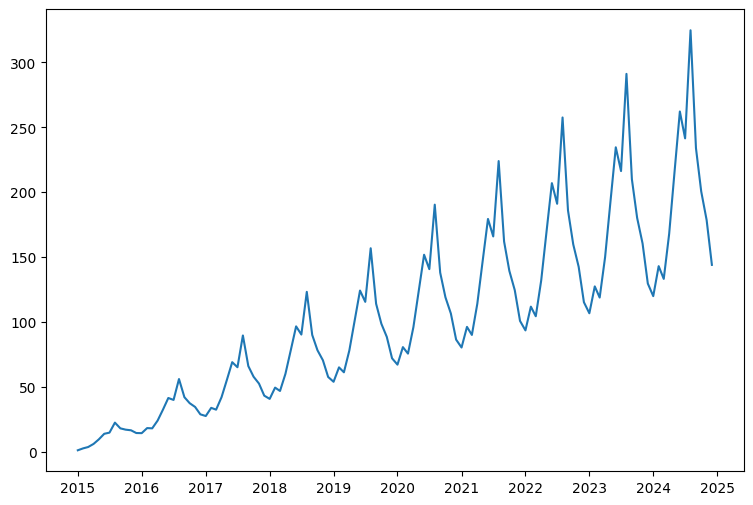

In [2]:
plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.show()

## Tweak #1 — Adjust rcParams to Set the Overall Theme

In [3]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

plt.rcParams.update({
    "figure.figsize": (9, 6),
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 14,
    "figure.titlesize": "xx-large",
    "xtick.labelsize": "medium",
    "ytick.labelsize": "medium",
    "axes.axisbelow": True
})

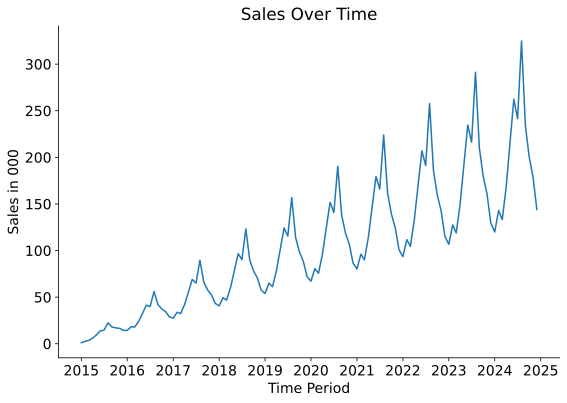

In [4]:
plt.plot(x, y)
plt.title("Sales Over Time")
plt.xlabel("Time Period")
plt.ylabel("Sales in 000")
plt.show()

## Tweak #2 — Bring the Font to the 21st Century

In [5]:
import matplotlib.font_manager as font_manager

font_dir = ["Roboto_Condensed"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

plt.rcParams.update({
    "font.family": "Roboto Condensed"
})

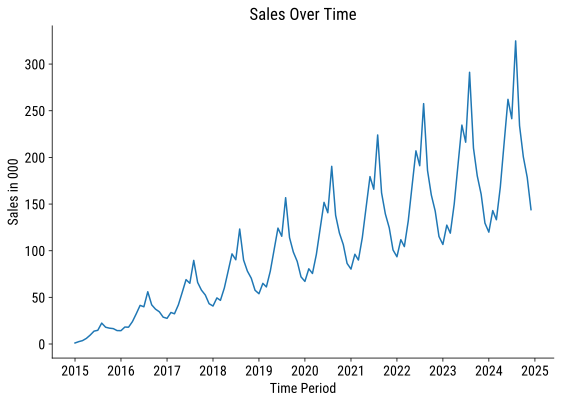

In [6]:
plt.plot(x, y)
plt.title("Sales Over Time")
plt.xlabel("Time Period")
plt.ylabel("Sales in 000")
plt.show()

## Tweak #3 — Make Micro Adjustment Specific to Your Chart Type

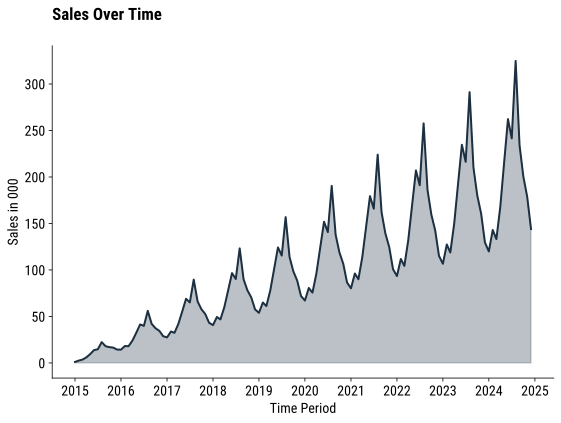

In [7]:
# 1. Line color and width
plt.plot(x, y, color="#1C3041", linewidth=2)
# 2. Add shaded area below the line
plt.fill_between(x, y, color="#1C3041", alpha=0.3)
# 3. Change title location and font weight
plt.title("Sales Over Time", loc="left", fontdict={"weight": "bold"}, y=1.06)

plt.xlabel("Time Period")
plt.ylabel("Sales in 000")
plt.show()